## 1. Inspecting transfusion.data file
<p><img src="https://assets.datacamp.com/production/project_646/img/blood_donation.png" style="float: right;" alt="A pictogram of a blood bag with blood donation written in it" width="200"></p>
<p>Blood transfusion saves lives - from replacing lost blood during major surgery or a serious injury to treating various illnesses and blood disorders. Ensuring that there's enough blood in supply whenever needed is a serious challenge for the health professionals. According to <a href="https://www.webmd.com/a-to-z-guides/blood-transfusion-what-to-know#1">WebMD</a>, "about 5 million Americans need a blood transfusion every year".</p>
<p>Our dataset is from a mobile blood donation vehicle in Taiwan. The Blood Transfusion Service Center drives to different universities and collects blood as part of a blood drive. We want to predict whether or not a donor will give blood the next time the vehicle comes to campus.</p>
<p>The data is stored in <code>datasets/transfusion.data</code> and it is structured according to RFMTC marketing model (a variation of RFM). We'll explore what that means later in this notebook. First, let's inspect the data.</p>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Print out the first 5 lines from the transfusion.data file
!head -n 5 transfusion.data

Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),"whether he/she donated blood in March 2007"
2 ,50,12500,98 ,1
0 ,13,3250,28 ,1
1 ,16,4000,35 ,1
2 ,20,5000,45 ,1


## 2. Loading the blood donations data
<p>We now know that we are working with a typical CSV file (i.e., the delimiter is <code>,</code>, etc.). We proceed to loading the data into memory.</p>

In [4]:
# Read in dataset
transfusion = pd.read_csv('transfusion.data')

# Print out the first rows of our dataset
transfusion.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


In [5]:
transfusion.shape

(748, 5)

## 3. Inspecting transfusion DataFrame
<p>Let's briefly return to our discussion of RFM model. RFM stands for Recency, Frequency and Monetary Value and it is commonly used in marketing for identifying your best customers. In our case, our customers are blood donors.</p>
<p>RFMTC is a variation of the RFM model. Below is a description of what each column means in our dataset:</p>
<ul>
<li>R (Recency - months since the last donation)</li>
<li>F (Frequency - total number of donation)</li>
<li>M (Monetary - total blood donated in c.c.)</li>
<li>T (Time - months since the first donation)</li>
<li>a binary variable representing whether he/she donated blood in March 2007 (1 stands for donating blood; 0 stands for not donating blood)</li>
</ul>
<p>It looks like every column in our DataFrame has the numeric type, which is exactly what we want when building a machine learning model. Let's verify our hypothesis.</p>

In [6]:
# Print a concise summary of transfusion DataFrame
transfusion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column                                      Non-Null Count  Dtype
---  ------                                      --------------  -----
 0   Recency (months)                            748 non-null    int64
 1   Frequency (times)                           748 non-null    int64
 2   Monetary (c.c. blood)                       748 non-null    int64
 3   Time (months)                               748 non-null    int64
 4   whether he/she donated blood in March 2007  748 non-null    int64
dtypes: int64(5)
memory usage: 29.3 KB


In [7]:
transfusion.describe()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
count,748.000000,748.000000,748.000000,748.000000,748.000000
mean,9.506684,5.514706,1378.676471,34.282086,0.237968
std,8.095396,5.839307,1459.826781,24.376714,0.426124
min,0.000000,1.000000,250.000000,2.000000,0.000000
25%,2.750000,2.000000,500.000000,16.000000,0.000000
50%,7.000000,4.000000,1000.000000,28.000000,0.000000
75%,14.000000,7.000000,1750.000000,50.000000,0.000000
max,74.000000,50.000000,12500.000000,98.000000,1.000000


## 4. Creating target column
<p>We are aiming to predict the value in <code>whether he/she donated blood in March 2007</code> column. Let's rename this it to <code>target</code> so that it's more convenient to work with.</p>

In [9]:
# Rename target column as 'target' for brevity
transfusion.rename(
    columns={'whether he/she donated blood in March 2007': 'target'},
    inplace=True
)

In [10]:
# Print out the first 2 rows
transfusion.head(2)

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),target
0,2,50,12500,98,1
1,0,13,3250,28,1


## 5. Checking target incidence
<p>We want to predict whether or not the same donor will give blood the next time the vehicle comes to campus. The model for this is a binary classifier, meaning that there are only 2 possible outcomes:</p>
<ul>
<li><code>0</code> - the donor will not give blood</li>
<li><code>1</code> - the donor will give blood</li>
</ul>
<p>Target incidence is defined as the number of cases of each individual target value in a dataset. That is, how many 0s in the target column compared to how many 1s? Target incidence gives us an idea of how balanced (or imbalanced) is our dataset.</p>

In [11]:
transfusion['target'].value_counts()

target
0    570
1    178
Name: count, dtype: int64

<Axes: xlabel='target'>

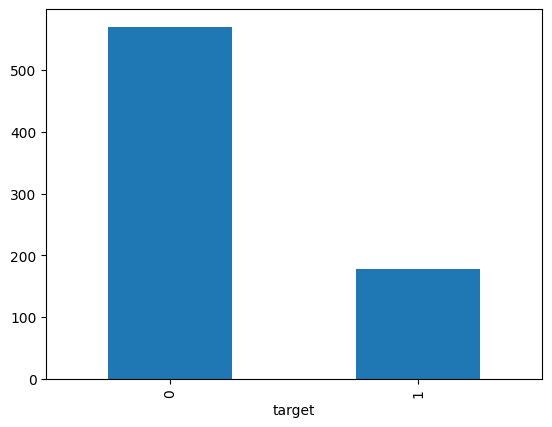

In [12]:
transfusion['target'].value_counts().plot(kind="bar")

In [13]:
transfusion.target.value_counts(normalize=True)

target
0    0.762032
1    0.237968
Name: proportion, dtype: float64

In [14]:
transfusion.corr()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),target
Recency (months),1.000000,-0.182745,-0.182745,0.160618,-0.279869
Frequency (times),-0.182745,1.000000,1.000000,0.634940,0.218633
Monetary (c.c. blood),-0.182745,1.000000,1.000000,0.634940,0.218633
Time (months),0.160618,0.634940,0.634940,1.000000,-0.035854
target,-0.279869,0.218633,0.218633,-0.035854,1.000000


<Axes: >

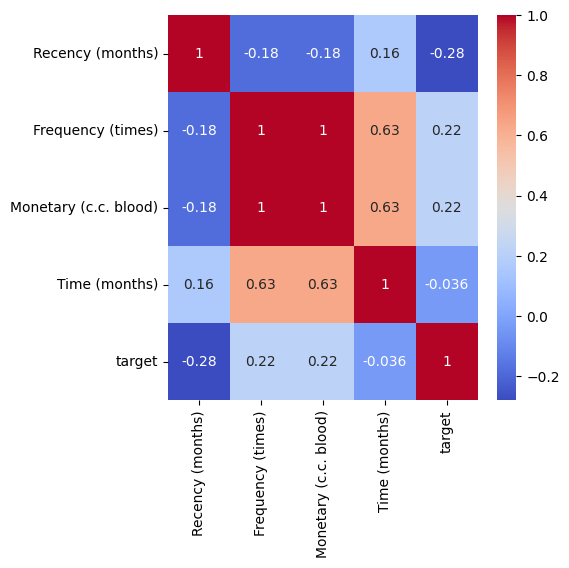

In [15]:
fig,ax = plt.subplots(figsize=(5,5))
sns.heatmap(transfusion.corr(),cmap = 'coolwarm',annot=True,ax=ax)

<ipython-input-16-654c1cedf1a2>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(transfusion['Frequency (times)'])


<Axes: xlabel='Frequency (times)', ylabel='Density'>

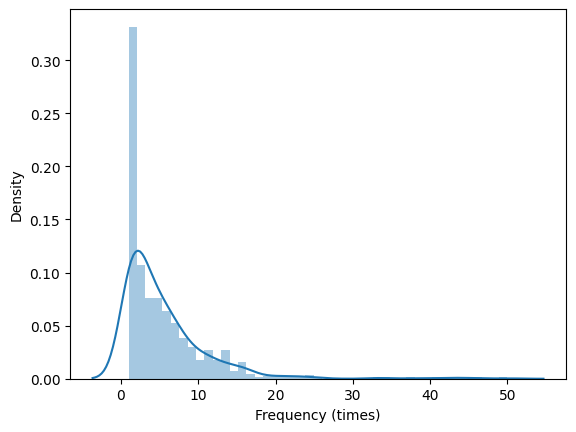

In [16]:
sns.distplot(transfusion['Frequency (times)'])

In [17]:
transfusion['Frequency (times)'].value_counts()

Frequency (times)
1     158
2     112
3      87
4      62
5      62
6      52
7      43
8      31
9      24
11     22
12     14
10     14
14     13
16     13
13      9
15      6
17      4
24      3
21      2
19      2
20      2
22      2
34      1
41      1
26      1
44      1
50      1
43      1
38      1
18      1
23      1
46      1
33      1
Name: count, dtype: int64

<ipython-input-21-6e58ca2aaa90>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(transfusion['Monetary (c.c. blood)'])


<Axes: xlabel='Monetary (c.c. blood)', ylabel='Density'>

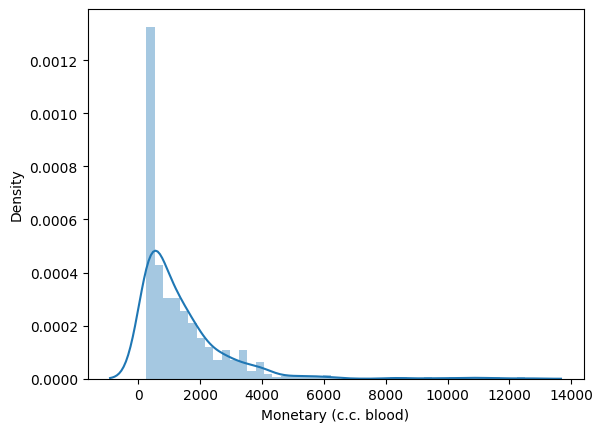

In [21]:
sns.distplot(transfusion['Monetary (c.c. blood)'])

In [22]:
transfusion['Monetary (c.c. blood)'].value_counts()

Monetary (c.c. blood)
250      158
500      112
750       87
1000      62
1250      62
1500      52
1750      43
2000      31
2250      24
2750      22
3000      14
2500      14
3500      13
4000      13
3250       9
3750       6
4250       4
6000       3
5250       2
4750       2
5000       2
5500       2
8500       1
10250      1
6500       1
11000      1
12500      1
10750      1
9500       1
4500       1
5750       1
11500      1
8250       1
Name: count, dtype: int64

<ipython-input-23-c2ede985ca89>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(transfusion['Recency (months)'])


<Axes: xlabel='Recency (months)', ylabel='Density'>

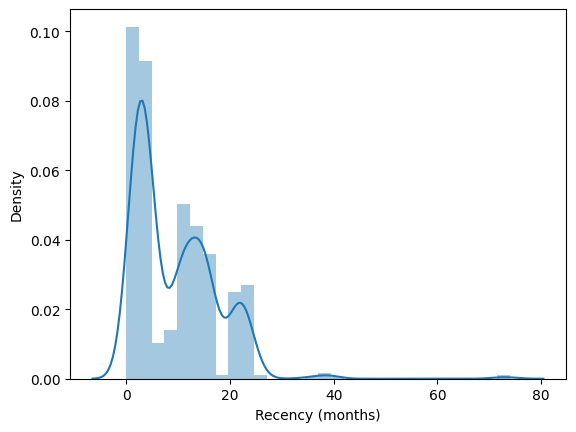

In [23]:
sns.distplot(transfusion['Recency (months)'])

In [24]:
transfusion['Recency (months)'].value_counts()

Recency (months)
2     173
4     156
11     84
14     76
16     63
23     50
21     44
9      20
3      13
1       9
7       8
5       6
8       6
12      6
6       5
13      5
0       5
10      3
38      2
18      2
15      2
22      1
26      1
35      1
40      1
74      1
20      1
17      1
25      1
39      1
72      1
Name: count, dtype: int64

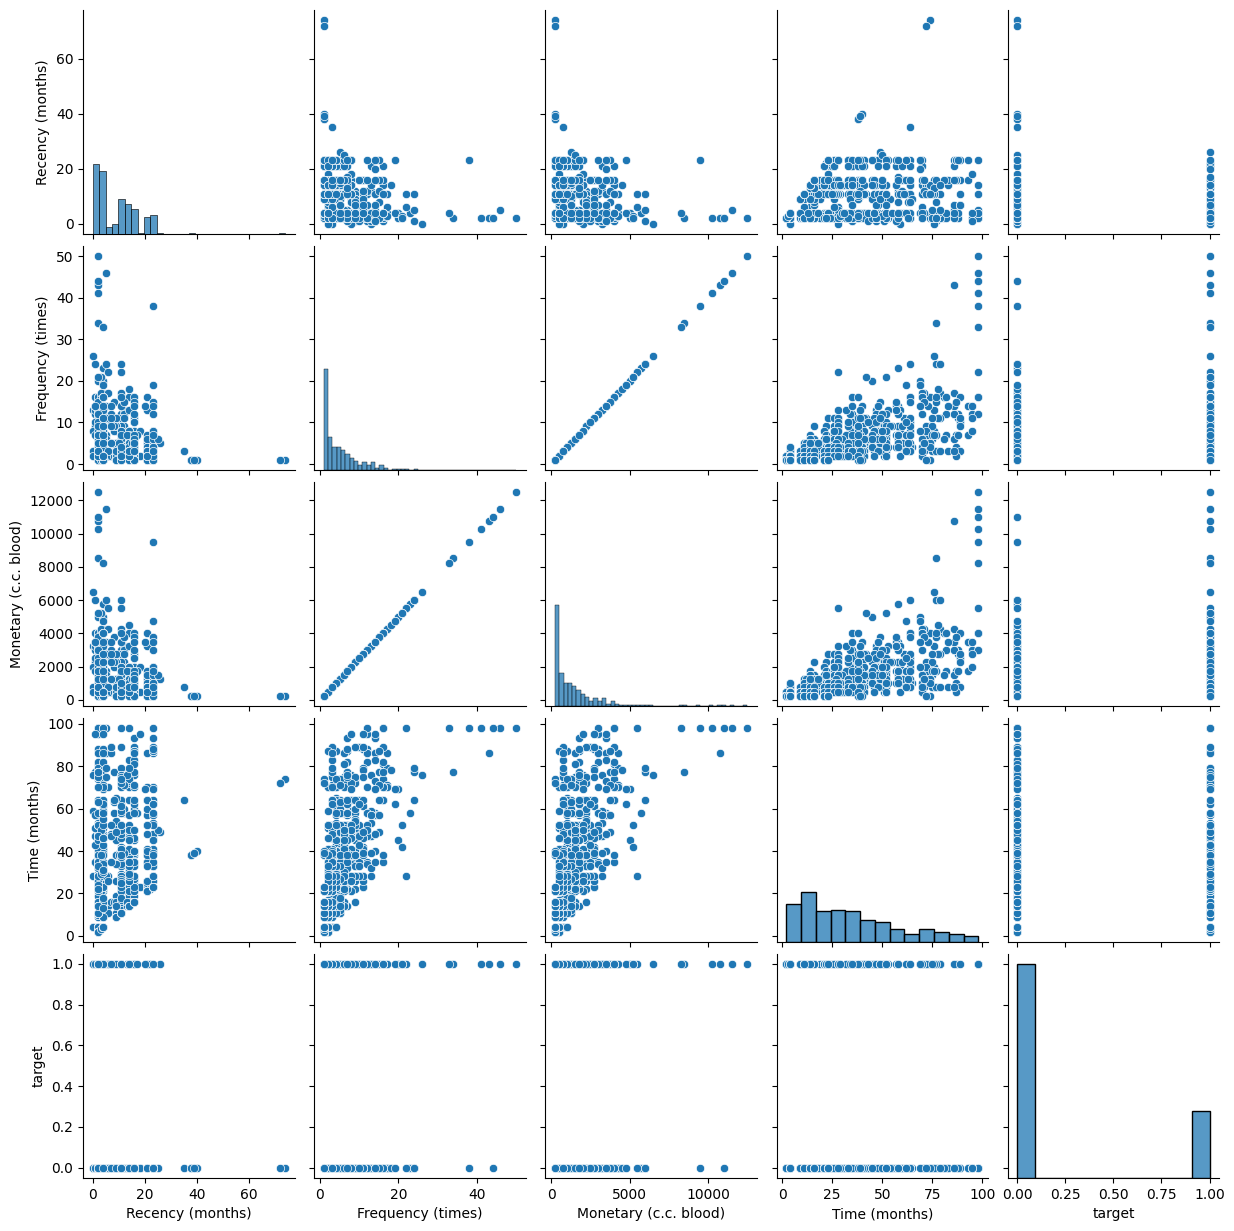

In [20]:
sns.pairplot(transfusion)

<Axes: ylabel='Frequency (times)'>

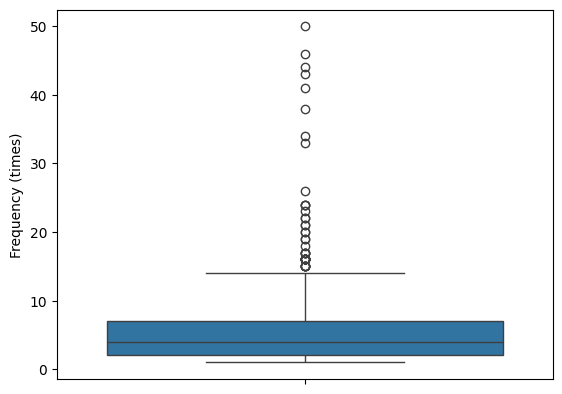

In [25]:
sns.boxplot(transfusion['Frequency (times)'])

<Axes: ylabel='Monetary (c.c. blood)'>

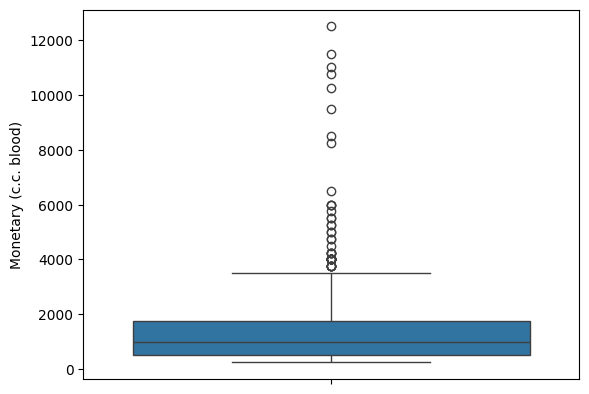

In [26]:
sns.boxplot(transfusion['Monetary (c.c. blood)'])

<Axes: ylabel='Recency (months)'>

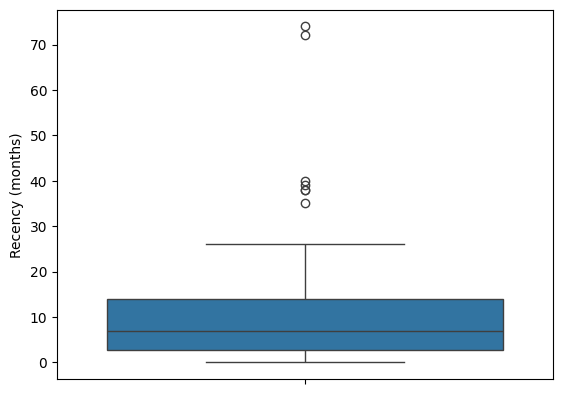

In [27]:
sns.boxplot(transfusion['Recency (months)'])

<Axes: ylabel='Time (months)'>

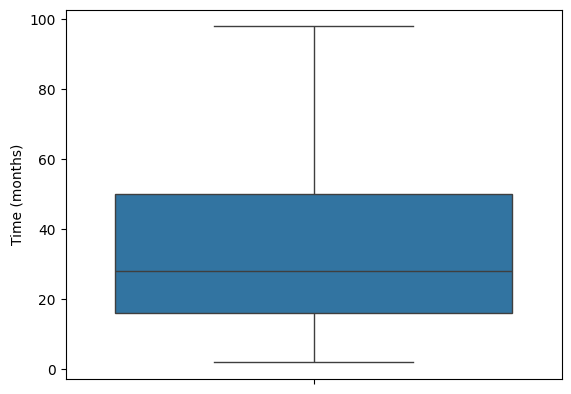

In [28]:
sns.boxplot(transfusion['Time (months)'])

In [29]:
from sklearn.preprocessing import RobustScaler

# Initialize the scaler
scaler = RobustScaler()

# Define the columns to be scaled
columns_to_scale = ['Recency (months)', 'Frequency (times)', 'Monetary (c.c. blood)', 'Time (months)']

# Fit and transform the columns with outliers
transfusion[columns_to_scale] = scaler.fit_transform(transfusion[columns_to_scale])


In [31]:
transfusion.head(10)

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),target
0,-0.444444,9.2,9.2,2.058824,1
1,-0.622222,1.8,1.8,0.000000,1
2,-0.533333,2.4,2.4,0.205882,1
3,-0.444444,3.2,3.2,0.500000,1
4,-0.533333,4.0,4.0,1.441176,0
5,-0.266667,0.0,0.0,-0.705882,0
6,-0.444444,0.6,0.6,-0.411765,1
7,-0.533333,1.6,1.6,0.205882,0
8,-0.444444,1.0,1.0,-0.176471,1
9,-0.177778,8.4,8.4,2.058824,1


In [67]:
from sklearn.model_selection import train_test_split

# Assuming X contains your features and y contains your target variable
X = transfusion.drop(columns=['target'])
y = transfusion['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [42]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Initialize the SVM classifier
svm_classifier = SVC(kernel='rbf', random_state=42)

# Train the classifier
svm_classifier.fit(X_train, y_train)

# Predictions on the training set
train_predictions = svm_classifier.predict(X_train)

# Predictions on the testing set
test_predictions = svm_classifier.predict(X_test)

# Calculate accuracy on training and testing sets
train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

Training Accuracy: 0.7892976588628763
Testing Accuracy: 0.7466666666666667


In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Initialize the logistic regression classifier
logistic_regression = LogisticRegression(random_state=42)

# Train the classifier
logistic_regression.fit(X_train, y_train)

# Predictions on the training set
train_predictions = logistic_regression.predict(X_train)

# Predictions on the testing set
test_predictions = logistic_regression.predict(X_test)

# Calculate accuracy on training and testing sets
train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)


Training Accuracy: 0.7759197324414716
Testing Accuracy: 0.76


In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Initialize the Random Forest classifier
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
random_forest.fit(X_train, y_train)

# Predictions on the training set
train_predictions = random_forest.predict(X_train)

# Predictions on the testing set
test_predictions = random_forest.predict(X_test)

# Calculate accuracy on training and testing sets
train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)


Training Accuracy: 0.9381270903010034
Testing Accuracy: 0.7133333333333334


In [46]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Initialize the XGBoost classifier
xgb_classifier = XGBClassifier(random_state=42)

# Train the classifier
xgb_classifier.fit(X_train, y_train)

# Predictions on the training set
train_predictions = xgb_classifier.predict(X_train)

# Predictions on the testing set
test_predictions = xgb_classifier.predict(X_test)

# Calculate accuracy on training and testing sets
train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)


Training Accuracy: 0.9163879598662207
Testing Accuracy: 0.74


In [47]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

# Initialize the XGBoost classifier
xgb_classifier = XGBClassifier(random_state=42)

# Define parameter grid for grid search
param_grid = {
    'learning_rate': [0.05, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 0.9, 1.0]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid, cv=5, scoring='accuracy')

# Perform grid search
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Train the classifier with the best parameters
xgb_classifier = XGBClassifier(**best_params, random_state=42)
xgb_classifier.fit(X_train, y_train)

# Predictions on the testing set
test_predictions = xgb_classifier.predict(X_test)

# Calculate accuracy on testing set
test_accuracy = accuracy_score(y_test, test_predictions)

print("Testing Accuracy after hyperparameter tuning:", test_accuracy)
print("Best Parameters:", best_params)


Testing Accuracy after hyperparameter tuning: 0.8133333333333334
Best Parameters: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1.0}


In [48]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Initialize the XGBoost classifier with the best parameters
xgb_classifier = XGBClassifier(learning_rate=0.05, max_depth=3, n_estimators=100, subsample=1.0, random_state=42)

# Train the classifier
xgb_classifier.fit(X_train, y_train)

# Predictions on the testing set
test_predictions = xgb_classifier.predict(X_test)

# Calculate accuracy on testing set
test_accuracy = accuracy_score(y_test, test_predictions)

print("Testing Accuracy with best parameters:", test_accuracy)


Testing Accuracy with best parameters: 0.8133333333333334


In [49]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

# Initialize the AdaBoost classifier
ada_classifier = AdaBoostClassifier(n_estimators=100, random_state=42)

# Train the classifier
ada_classifier.fit(X_train, y_train)

# Predictions on the testing set
test_predictions = ada_classifier.predict(X_test)

# Calculate accuracy on testing set
test_accuracy = accuracy_score(y_test, test_predictions)

print("Testing Accuracy with AdaBoost:", test_accuracy)


Testing Accuracy with AdaBoost: 0.7866666666666666


In [52]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

# Initialize the AdaBoost classifier
ada_classifier = AdaBoostClassifier(random_state=42)

# Define parameter grid for grid search
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5, 1.0]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=ada_classifier, param_grid=param_grid, cv=5, scoring='accuracy')

# Perform grid search
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Train the classifier with the best parameters
ada_classifier = AdaBoostClassifier(**best_params, random_state=42)
ada_classifier.fit(X_train, y_train)

# Predictions on the testing set
test_predictions = ada_classifier.predict(X_test)

# Calculate accuracy on testing set
test_accuracy = accuracy_score(y_test, test_predictions)

print("Testing Accuracy after hyperparameter tuning:", test_accuracy)
print("Best Parameters:", best_params)


Testing Accuracy after hyperparameter tuning: 0.8066666666666666
Best Parameters: {'learning_rate': 1.0, 'n_estimators': 50}


In [54]:
pip install bayesian-optimization


In [71]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from bayes_opt import BayesianOptimization

# Load your dataset or replace this with your actual dataset
# Assuming X_train, X_test, y_train, y_test are already defined
# with the appropriate data
# Example:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the function to optimize
def optimize_adaboost(n_estimators, learning_rate):
    # Convert parameters to integer and float
    n_estimators = int(n_estimators)

    # Initialize AdaBoost classifier with the specified parameters
    ada_classifier = AdaBoostClassifier(n_estimators=n_estimators, learning_rate=learning_rate, random_state=42)

    # Train the classifier
    ada_classifier.fit(X_train, y_train)

    # Predictions on the testing set
    test_predictions = ada_classifier.predict(X_test)

    # Calculate accuracy on testing set
    test_accuracy = accuracy_score(y_test, test_predictions)

    return test_accuracy

# Define parameter bounds
pbounds = {'n_estimators': (50, 300),  # Extend the range of n_estimators
           'learning_rate': (0.01, 1.0)}

# Initialize BayesianOptimization
optimizer = BayesianOptimization(
    f=optimize_adaboost,
    pbounds=pbounds,
    random_state=42,
)

# Perform optimization with increased iterations
optimizer.maximize(init_points=20, n_iter=50)  # Increase the number of initial points and iterations

# Get the best parameters
best_params = optimizer.max['params']

# Train AdaBoost classifier with the best parameters
best_adaboost = AdaBoostClassifier(n_estimators=int(best_params['n_estimators']),
                                   learning_rate=best_params['learning_rate'],
                                   random_state=42)

best_adaboost.fit(X_train, y_train)

# Predictions on the testing set
test_predictions = best_adaboost.predict(X_test)

# Calculate accuracy on testing set
test_accuracy = accuracy_score(y_test, test_predictions)

print("Testing Accuracy with AdaBoost after Bayesian optimization:", test_accuracy)
print("Best Parameters:", best_params)


|   iter    |  target   | learni... | n_esti... |
-------------------------------------------------
| 1         | 0.8       | 0.3808    | 287.7     |
| 2         | 0.7867    | 0.7347    | 199.7     |
| 3         | 0.7733    | 0.1645    | 89.0      |
| 4         | 0.8067    | 0.0675    | 266.5     |
| 5         | 0.7933    | 0.6051    | 227.0     |
| 6         | 0.7733    | 0.03038   | 292.5     |
| 7         | 0.7867    | 0.8341    | 103.1     |
| 8         | 0.8067    | 0.19      | 95.85     |
| 9         | 0.8133    | 0.3112    | 181.2     |
| 10        | 0.8       | 0.4376    | 122.8     |
| 11        | 0.8067    | 0.6157    | 84.87     |
| 12        | 0.8067    | 0.2992    | 141.6     |
| 13        | 0.7933    | 0.4615    | 246.3     |
| 14        | 0.8067    | 0.2077    | 178.6     |
| 15        | 0.8067    | 0.5965    | 61.61     |
| 16        | 0.8133    | 0.6115    | 92.63     |
| 17        | 0.8067    | 0.0744    | 287.2     |
| 18        | 0.7733    | 0.966     | 252.1     |


In [72]:
best_adaboost.predict([[1.422222,0.6,0.6,1.764706]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


array([0])

In [73]:
best_adaboost.predict([[2,12,3000,47 ]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


array([1])

In [74]:
import pickle
# Save the model to a file
with open('best_adaboost.pkl', 'wb') as f:
  pickle.dump(best_adaboost, f)

Conclusion:- By using AdaBoost I have increased model accuracy upto 0.8133.